## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [6]:
#write your solution here
import pandas as pd
import matplotlib.pyplot as plt

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [7]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv("goodreads.csv")


#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()



4.40  136455  0439023483  good_reads:book  \
0  4.41   16648  0439358078  good_reads:book   
1  3.56   85746  0316015849  good_reads:book   
2  4.23   47906  0061120081  good_reads:book   
3  4.23   34772  0679783261  good_reads:book   
4  4.25   12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html    2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478.0   
1                          dir01/41865.Twilight.html  2579564.0   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123.0   
3                dir01/1885.Pride_and_Prejudice.html  1388992.0   
4                dir01/18405.Gone_with_the_Wind.html   645470.0   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [8]:
#Read the data into a dataframe specifying column names

df = pd.read_csv("goodreads.csv", names = ['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'])
#Examine the first couple of rows of the dataframe
####### 
#   Insert your code

####### 
df.head()


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html     2958974.0   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...     1284478.0   
2                          dir01/41865.Twilight.html     2579564.0   
3              dir01/2657.To_Kill_a_Mockingbird.html     2078123.0   
4                dir01/1885.Pride_and_Prejudice.html     1388992.0   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [9]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes


rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count    float64
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [10]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()


rating            0
review_count      0
isbn            147
booktype          0
author_url        0
year              2
genre_urls       12
dir               1
rating_count      1
name              1
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer :  No, there are nan values in some of the columns

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [11]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()


rating            0
review_count      0
isbn            147
booktype          0
author_url        0
year              2
genre_urls       12
dir               1
rating_count      1
name              1
dtype: int64

In [12]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna() == True]


Empty DataFrame
Columns: [rating, review_count, isbn, booktype, author_url, year, genre_urls, dir, rating_count, name]
Index: []

In [13]:
df[df.year.isna() == True]

rating  review_count        isbn         booktype  \
2442    4.23           526         NaN  good_reads:book   
2651    4.23            10  1608623742  good_reads:book   

                                             author_url  year  \
2442  https://www.goodreads.com/author/show/623606.A...   NaN   
2651                                   https://www.good   NaN   

                                             genre_urls  \
2442  /genres/religion|/genres/islam|/genres/non-fic...   
2651                                                NaN   

                               dir  rating_count       name  
2442  dir25/1301625.La_Tahzan.html        4134.0  La Tahzan  
2651                           NaN           NaN        NaN

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [14]:
df.shape

(2652, 10)

In [15]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset=['year','rating'], inplace=True)
df.shape

(2650, 10)

Ok so we have done some cleaning. Is it enough? 

In [16]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count    float64
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [17]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df.review_count = df.review_count.astype('int')
df.rating = df.rating.astype('int')
df.year = df.year.astype('int')

Final check

Some of the other colums that should be strings have NaN. 

In [18]:
#Insert Your code here
df.dtypes

rating            int64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count    float64
name             object
dtype: object

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [19]:
#Get the first author_url

url = df.author_url[0]
url

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [20]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
author = url.split(".")[-1] #last list
author

'Suzanne_Collins'

In [21]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    #######
    
def get_author(url):
    author_name = url.split(".")[-1]
    return author_name
    
    

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()



rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html     2958974.0   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...     1284478.0   
2                          dir01/41865.Twilight.html     2579564.0   
3              dir01/2657.To_Kill_a_Mockingbird.html     2078123.0   
4                dir01/1885.Pride_and_Prejudice.html     1388992.0   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [22]:
newdf = df.dropna(subset=['genre_urls'])
newdf.shape

(2639, 11)

In [23]:
#Get first genre_url
url_genre = newdf.genre_urls[0]
url_genre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [24]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######
genres = url_genre.split("/genres/")[1:]
genres

['young-adult|',
 'science-fiction|',
 'dystopia|',
 'fantasy|',
 'science-fiction|',
 'romance|',
 'adventure|',
 'book-club|',
 'young-adult|',
 'teen|',
 'apocalyptic|',
 'post-apocalyptic|',
 'action']

In [25]:
#List comprihension rather than loop
newgenres = [genre.replace("|","") for genre in genres]
newgenres

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [26]:
#storing it in string format.
genres = "|".join(newgenres)
genres

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [27]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    #######
def get_genre(url):
        genres = url.split("/genres/")[1:]
        newgenre = [genre.replace("|","") for genre in genres]
        genres = "|".join(newgenre)
        return genres


newdf['Genres'] = newdf.genre_urls.map(get_genre)
newdf.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html     2958974.0   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...     1284478.0   
2                          dir01/41865.Twilight.html     2579564.0   
3              dir01/2657.To_Kill_a_Mockingbird.html     2078123.0   
4                dir01/1885.Pride_and_Prejudice.html     1388992.0   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              Genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

---


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [28]:
#Determine best book using review_count 
yeardf = df.groupby('year', sort=False)
yeardf

In [29]:
yeardf.size()

year
2008    106
2003     68
2005     69
1960     12
1813      1
       ... 
1824      1
1791      1
213       1
1002      1
1893      1
Length: 246, dtype: int64

Try this for few other definitions of the "best book" using `.groupby`.

In [30]:
#first record from each group
yeardf.first()


rating  review_count        isbn         booktype  \
year                                                      
2008       4        136455  0439023483  good_reads:book   
2003       4         16648  0439358078  good_reads:book   
2005       3         85746  0316015849  good_reads:book   
1960       4         47906  0061120081  good_reads:book   
1813       4         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
1824       3           120  0140424520  good_reads:book   
1791       3          1462  0743255062  good_reads:book   
213        3           297  1841956724  good_reads:book   
1002       4           222  0231073372  good_reads:book   
1893       4           804  0192123092  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/153394.S...   
2003  https://www.goodreads.com/author/show/1077326....   
2005  https://www.goodreads.com/author/show/941441.S...   
1960  https://www.goodreads.com/author/show/1825.Har...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1824  https://www.goodreads.com/author/show/44407.Ge...   
1791  https://www.goodreads.com/author/show/289513.B...   
213   https://www.goodreads.com/author/show/211631.E...   
1002  https://www.goodreads.com/author/show/10983.Se...   
1893  https://www.goodreads.com/author/show/2448.Art...   

                                             genre_urls  \
year                                                      
2008  /genres/young-adult|/genres/science-fiction|/g...   
2003  /genres/fantasy|/genres/young-adult|/genres/fi...   
2005  /genres/young-adult|/genres/fantasy|/genres/ro...   
1960  /genres/classics|/genres/fiction|/genres/histo...   
1813  /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
1824  /genres/classics|/genres/fiction|/genres/poetr...   
1791  /genres/history|/genres/non-fiction|/genres/bi...   
213   /genres/fiction|/genres/contemporary|/genres/e...   
1002  /genres/asian-literature|/genres/japanese-lite...   
1893  /genres/mystery|/genres/classics|/genres/ficti...   

                                                    dir  rating_count  \
year                                                                    
2008                dir01/2767052-the-hunger-games.html     2958974.0   
2003  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...     1284478.0   
2005                          dir01/41865.Twilight.html     2579564.0   
1960              dir01/2657.To_Kill_a_Mockingbird.html     2078123.0   
1813                dir01/1885.Pride_and_Prejudice.html     1388992.0   
...                                                 ...           ...   
1824                          dir26/78249.Don_Juan.html        4694.0   
1791  dir26/52309.The_Autobiography_of_Benjamin_Fran...       23692.0   
213                       dir26/604635.Na_ve_Super.html        6713.0   
1002                   dir26/18185.The_Pillow_Book.html        2779.0   
1893   dir27/194373.The_Memoirs_of_Sherlock_Holmes.html       44646.0   

                                                   name               author  
year                                                                          
2008            The Hunger Games (The Hunger Games, #1)      Suzanne_Collins  
2003  Harry Potter and the Order of the Phoenix (Har...          J_K_Rowling  
2005                            Twilight (Twilight, #1)      Stephenie_Meyer  
1960                              To Kill a Mockingbird           Harper_Lee  
1813                                Pride and Prejudice          Jane_Austen  
...                                                 ...                  ...  
1824                                           Don Juan  George_Gordon_Byron  
1791             The Autobiography of Ben

In [31]:
#Last record from each group
yeardf.last()

rating  review_count        isbn         booktype  \
year                                                      
2008       4           321  0441017770  good_reads:book   
2003       3          1797  1400032814  good_reads:book   
2005       4           297  006074457X  good_reads:book   
1960       3          1894  0449911659  good_reads:book   
1813       4         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
1824       3           120  0140424520  good_reads:book   
1791       3          1462  0743255062  good_reads:book   
213        3           297  1841956724  good_reads:book   
1002       4           222  0231073372  good_reads:book   
1893       4           804  0192123092  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/17061.Ch...   
2003  https://www.goodreads.com/author/show/2546.Chu...   
2005  https://www.goodreads.com/author/show/27498.Er...   
1960  https://www.goodreads.com/author/show/6878.Joh...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1824  https://www.goodreads.com/author/show/44407.Ge...   
1791  https://www.goodreads.com/author/show/289513.B...   
213   https://www.goodreads.com/author/show/211631.E...   
1002  https://www.goodreads.com/author/show/10983.Se...   
1893  https://www.goodreads.com/author/show/2448.Art...   

                                             genre_urls  \
year                                                      
2008  /genres/paranormal|/genres/vampires|/genres/fa...   
2003  /genres/fiction|/genres/horror|/genres/contemp...   
2005  /genres/fantasy|/genres/animals|/genres/fictio...   
1960  /genres/fiction|/genres/classics|/genres/liter...   
1813  /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
1824  /genres/classics|/genres/fiction|/genres/poetr...   
1791  /genres/history|/genres/non-fiction|/genres/bi...   
213   /genres/fiction|/genres/contemporary|/genres/e...   
1002  /genres/asian-literature|/genres/japanese-lite...   
1893  /genres/mystery|/genres/classics|/genres/ficti...   

                                                    dir  rating_count  \
year                                                                    
2008  dir27/4902793-sookie-stackhouse-7-copy-boxed-s...       18897.0   
2003                             dir27/22284.Diary.html       48673.0   
2005                             dir27/111021.Dawn.html       13982.0   
1960                        dir25/85386.Rabbit_Run.html       29776.0   
1813                dir01/1885.Pride_and_Prejudice.html     1388992.0   
...                                                 ...           ...   
1824                          dir26/78249.Don_Juan.html        4694.0   
1791  dir26/52309.The_Autobiography_of_Benjamin_Fran...       23692.0   
213                       dir26/604635.Na_ve_Super.html        6713.0   
1002                   dir26/18185.The_Pillow_Book.html        2779.0   
1893   dir27/194373.The_Memoirs_of_Sherlock_Holmes.html       44646.0   

                                                   name               author  
year                                                                          
2008  Sookie Stackhouse 7-copy Boxed Set (Sookie Sta...     Charlaine_Harris  
2003                                              Diary      Chuck_Palahniuk  
2005              Dawn (Warriors: The New Prophecy, #3)          Erin_Hunter  
1960                  Rabbit, Run (Rabbit Angstrom, #1)          John_Updike  
1813                                Pride and Prejudice          Jane_Austen  
...                                                 ...                  ...  
1824                                           Don Juan  George_Gordon_Byron  
1791             The Autobiography of Ben

In [32]:
yeardf.groups

{2008: [0, 127, 138, 188, 195, 198, 289, 309, 337, 343, 368, 380, 383, 422, 434, 459, 471, 478, 479, 483, 501, 544, 584, 653, 657, 663, 698, 730, 738, 751, 763, 805, 825, 840, 847, 862, 902, 937, 941, 943, 959, 1005, 1024, 1025, 1057, 1061, 1090, 1095, 1137, 1142, 1150, 1172, 1262, 1328, 1401, 1414, 1420, 1425, 1472, 1531, 1545, 1568, 1585, 1598, 1602, 1615, 1635, 1778, 1808, 1832, 1861, 1862, 1890, 1901, 1904, 1905, 1918, 1988, 2007, 2008, 2040, 2047, 2049, 2058, 2083, 2088, 2136, 2149, 2158, 2164, 2189, 2193, 2237, 2258, 2288, 2293, 2302, 2321, 2348, 2363, ...], 2003: [1, 11, 16, 113, 115, 238, 286, 297, 376, 435, 442, 470, 555, 574, 590, 630, 640, 690, 757, 784, 811, 856, 898, 987, 1044, 1146, 1213, 1221, 1240, 1312, 1356, 1363, 1380, 1415, 1470, 1503, 1520, 1564, 1571, 1619, 1675, 1780, 1817, 1859, 1883, 1910, 1920, 1955, 1983, 2031, 2066, 2105, 2131, 2213, 2226, 2252, 2254, 2327, 2356, 2396, 2447, 2453, 2457, 2462, 2569, 2571, 2603, 2604], 2005: [2, 12, 79, 87, 157, 192, 205, 212,

In [33]:
yeardf.get_group(2008)

rating  review_count        isbn         booktype  \
0          4        136455  0439023483  good_reads:book   
127        4          7508  1595141979  good_reads:book   
138        4          7460  1595141758  good_reads:book   
188        4          8996  1423101464  good_reads:book   
195        4          8630         NaN  good_reads:book   
...      ...           ...         ...              ...   
2416       3          3641  0805076689  good_reads:book   
2423       4          1613  0575077905  good_reads:book   
2474       4           886  0060788704  good_reads:book   
2590       4          2068  1849231842  good_reads:book   
2613       4           321  0441017770  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
127   https://www.goodreads.com/author/show/137902.R...  2008   
138   https://www.goodreads.com/author/show/137902.R...  2008   
188   https://www.goodreads.com/author/show/15872.Ri...  2008   
195   https://www.goodreads.com/author/show/941441.S...  2008   
...                                                 ...   ...   
2416  https://www.goodreads.com/author/show/123463.M...  2008   
2423  https://www.goodreads.com/author/show/276660.J...  2008   
2474  https://www.goodreads.com/author/show/17054.Ki...  2008   
2590  https://www.goodreads.com/author/show/2958084....  2008   
2613  https://www.goodreads.com/author/show/17061.Ch...  2008   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
127   /genres/paranormal|/genres/vampires|/genres/fa...   
138   /genres/paranormal|/genres/vampires|/genres/yo...   
188   /genres/young-adult|/genres/fantasy|/genres/my...   
195   /genres/young-adult|/genres/paranormal|/genres...   
...                                                 ...   
2416  /genres/young-adult|/genres/science-fiction|/g...   
2423  /genres/fantasy|/genres/fiction|/genres/fantas...   
2474  /genres/fantasy|/genres/fantasy|/genres/urban-...   
2590  /genres/romance|/genres/romance|/genres/contem...   
2613  /genres/paranormal|/genres/vampires|/genres/fa...   

                                                    dir  rating_count  \
0                   dir01/2767052-the-hunger-games.html     2958974.0   
127                      dir02/2802316-shadow-kiss.html      184786.0   
138                        dir02/2282133.Frostbite.html      193452.0   
188      dir02/2120932.The_Battle_of_the_Labyrinth.html      360183.0   
195                     dir02/4502877-midnight-sun.html      124018.0   
...                                                 ...           ...   
2416      dir25/1902241.The_Adoration_of_Jenna_Fox.html       28751.0   
2423           dir25/944076.Last_Argument_of_Kings.html       38665.0   
2474          dir25/1225621.The_Outlaw_Demon_Wails.html       37266.0   
2590                      dir26/6538757-rock-chick.html       25817.0   
2613  dir27/4902793-sookie-stackhouse-7-copy-boxed-s...       18897.0   

                                                   name            author  
0               The Hunger Games (The Hunger Games, #1)   Suzanne_Collins  
127                   Shadow Kiss (Vampire Academy, #3)     Richelle_Mead  
138                     Frostbite (Vampire Academy, #2)     Richelle_Mead  
188   The Battle of the Labyrinth (Percy Jackson and...      Rick_Riordan  
195                       Midnight Sun (Twilight, #1.5)   Stephenie_Meyer  
...                                                 ...               ...  
2416  The Adoration of Jenna Fox (Jenna Fox Chronicl...    Mary_E_Pearson  
2423          Last Argument of Kings (The First Law #3)   Joe_Abercrombie  
2474           The Outlaw Demon Wails (The Hollows, #6)      Kim_Harrison  
2590                        Rock Chick (Rock Chick, #1)    Kristen_Ashley  
2613  Sookie Stackhouse 7-copy Boxed Set (Sookie Sta...  Charlaine_Harris  

[106 rows x 11 co

In [34]:
#maximum value from each group
yeardf.max()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


rating  review_count         booktype  \
year                                          
2008       4        136455  good_reads:book   
2003       4         38061  good_reads:book   
2005       4         85746  good_reads:book   
1960       4         47906  good_reads:book   
1813       4         34772  good_reads:book   
...      ...           ...              ...   
1824       3           120  good_reads:book   
1791       3          1462  good_reads:book   
213        3           297  good_reads:book   
1002       4           222  good_reads:book   
1893       4           804  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/982213.D...   
2003  https://www.goodreads.com/author/show/9987.Phi...   
2005  https://www.goodreads.com/author/show/9987.Phi...   
1960  https://www.goodreads.com/author/show/8113.Joh...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1824  https://www.goodreads.com/author/show/44407.Ge...   
1791  https://www.goodreads.com/author/show/289513.B...   
213   https://www.goodreads.com/author/show/211631.E...   
1002  https://www.goodreads.com/author/show/10983.Se...   
1893  https://www.goodreads.com/author/show/2448.Art...   

                                                    dir  rating_count  \
year                                                                    
2008  dir27/4902793-sookie-stackhouse-7-copy-boxed-s...     2958974.0   
2003        dir27/535441.The_Zombie_Survival_Guide.html     1284478.0   
2005          dir27/9503.Saving_Fish_from_Drowning.html     2579564.0   
1960                        dir25/85386.Rabbit_Run.html     2078123.0   
1813                dir01/1885.Pride_and_Prejudice.html     1388992.0   
...                                                 ...           ...   
1824                          dir26/78249.Don_Juan.html        4694.0   
1791  dir26/52309.The_Autobiography_of_Benjamin_Fran...       23692.0   
213                       dir26/604635.Na_ve_Super.html        6713.0   
1002                   dir26/18185.The_Pillow_Book.html        2779.0   
1893   dir27/194373.The_Memoirs_of_Sherlock_Holmes.html       44646.0   

                                                   name               author  
year                                                                          
2008                                     ÙÙØªÙØ¨ÙØ§                    _  
2003                                      ÙØ§ ØªØ­Ø²Ù       William_Gibson  
2005                                     Vanishing Acts           Wendy_Mass  
1960                              To Kill a Mockingbird         Walker_Percy  
1813                                Pride and Prejudice          Jane_Austen  
...                                                 ...                  ...  
1824                                           Don Juan  George_Gordon_Byron  
1791             The Autobiography of Benjamin Franklin    Benjamin_Franklin  
213                                       NaÃ¯ve. Super           Erlend_Loe  
1002                                    The Pillow Book         Sei_Sh_nagon  
1893  The Memoirs of Sherlock Holmes (Sherlock Holme...   Arthur_Conan_Doyle  

[246 rows x 8 columns]

In [35]:
yeardf.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


rating  review_count         booktype  \
year                                          
2008       3            98  good_reads:book   
2003       3           207  good_reads:book   
2005       3           237  good_reads:book   
1960       3           242  good_reads:book   
1813       4         34772  good_reads:book   
...      ...           ...              ...   
1824       3           120  good_reads:book   
1791       3          1462  good_reads:book   
213        3           297  good_reads:book   
1002       4           222  good_reads:book   
1893       4           804  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/1077326....   
2003  https://www.goodreads.com/author/show/10289.De...   
2005  https://www.goodreads.com/author/show/10317.Ma...   
1960  https://www.goodreads.com/author/show/13898.P_...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1824  https://www.goodreads.com/author/show/44407.Ge...   
1791  https://www.goodreads.com/author/show/289513.B...   
213   https://www.goodreads.com/author/show/211631.E...   
1002  https://www.goodreads.com/author/show/10983.Se...   
1893  https://www.goodreads.com/author/show/2448.Art...   

                                                    dir  rating_count  \
year                                                                    
2008                dir01/2767052-the-hunger-games.html         646.0   
2003       dir01/18619684-the-time-traveler-s-wife.html        8170.0   
2005                    dir01/19063.The_Book_Thief.html        2404.0   
1960                dir01/23772.Green_Eggs_and_Ham.html        4375.0   
1813                dir01/1885.Pride_and_Prejudice.html     1388992.0   
...                                                 ...           ...   
1824                          dir26/78249.Don_Juan.html        4694.0   
1791  dir26/52309.The_Autobiography_of_Benjamin_Fran...       23692.0   
213                       dir26/604635.Na_ve_Super.html        6713.0   
1002                   dir26/18185.The_Pillow_Book.html        2779.0   
1893   dir27/194373.The_Memoirs_of_Sherlock_Holmes.html       44646.0   

                                                   name               author  
year                                                                          
2008                            A Fraction of the Whole       Alison_Goodman  
2003      A Great and Terrible Beauty (Gemma Doyle, #1)        A_id_al_Qarni  
2005  13 Little Blue Envelopes (Little Blue Envelope...              Amy_Tan  
1960                                 Are You My Mother?             Dr_Seuss  
1813                                Pride and Prejudice          Jane_Austen  
...                                                 ...                  ...  
1824                                           Don Juan  George_Gordon_Byron  
1791             The Autobiography of Benjamin Franklin    Benjamin_Franklin  
213                                       NaÃ¯ve. Super           Erlend_Loe  
1002                                    The Pillow Book         Sei_Sh_nagon  
1893  The Memoirs of Sherlock Holmes (Sherlock Holme...   Arthur_Conan_Doyle  

[246 rows x 8 columns]

In [36]:
yeardf.mean()

rating  review_count  rating_count
year                                      
2008  3.613208   5957.867925  1.050388e+05
2003  3.470588   4884.941176  1.284623e+05
2005  3.565217   7747.159420  1.631910e+05
1960  3.750000   5601.000000  2.494626e+05
1813  4.000000  34772.000000  1.388992e+06
...        ...           ...           ...
1824  3.000000    120.000000  4.694000e+03
1791  3.000000   1462.000000  2.369200e+04
213   3.000000    297.000000  6.713000e+03
1002  4.000000    222.000000  2.779000e+03
1893  4.000000    804.000000  4.464600e+04

[246 rows x 3 columns]

In [37]:
 #applying methods to particular rows
yeardf['review_count'].mean()

year
2008     5957.867925
2003     4884.941176
2005     7747.159420
1960     5601.000000
1813    34772.000000
            ...     
1824      120.000000
1791     1462.000000
213       297.000000
1002      222.000000
1893      804.000000
Name: review_count, Length: 246, dtype: float64

In [38]:
#applying to methods to multiple columns.
yeardf[['rating','review_count']].mean()

rating  review_count
year                        
2008  3.613208   5957.867925
2003  3.470588   4884.941176
2005  3.565217   7747.159420
1960  3.750000   5601.000000
1813  4.000000  34772.000000
...        ...           ...
1824  3.000000    120.000000
1791  3.000000   1462.000000
213   3.000000    297.000000
1002  4.000000    222.000000
1893  4.000000    804.000000

[246 rows x 2 columns]

In [39]:
 #pass dictionary to apply appropriate aggregation function to each feature/column
yeardf.agg({"rating":'max','review_count':'mean'})

rating  review_count
year                      
2008       4   5957.867925
2003       4   4884.941176
2005       4   7747.159420
1960       4   5601.000000
1813       4  34772.000000
...      ...           ...
1824       3    120.000000
1791       3   1462.000000
213        3    297.000000
1002       4    222.000000
1893       4    804.000000

[246 rows x 2 columns]

In [40]:
 #pass list to apply multiple aggregation function at once.
yeardf.agg(['mean','median','max'])

rating             review_count                   rating_count  \
          mean median max          mean   median     max          mean   
year                                                                     
2008  3.613208    4.0   4   5957.867925   2770.0  136455  1.050388e+05   
2003  3.470588    3.0   4   4884.941176   2462.0   38061  1.284623e+05   
2005  3.565217    4.0   4   7747.159420   3016.0   85746  1.631910e+05   
1960  3.750000    4.0   4   5601.000000   1345.5   47906  2.494626e+05   
1813  4.000000    4.0   4  34772.000000  34772.0   34772  1.388992e+06   
...        ...    ...  ..           ...      ...     ...           ...   
1824  3.000000    3.0   3    120.000000    120.0     120  4.694000e+03   
1791  3.000000    3.0   3   1462.000000   1462.0    1462  2.369200e+04   
213   3.000000    3.0   3    297.000000    297.0     297  6.713000e+03   
1002  4.000000    4.0   4    222.000000    222.0     222  2.779000e+03   
1893  4.000000    4.0   4    804.000000    804.0     804  4.464600e+04   

                            
         median        max  
year                        
2008    43850.5  2958974.0  
2003    53844.5  1284478.0  
2005    51670.0  2579564.0  
1960    42375.5  2078123.0  
1813  1388992.0  1388992.0  
...         ...        ...  
1824     4694.0     4694.0  
1791    23692.0    23692.0  
213      6713.0     6713.0  
1002     2779.0     2779.0  
1893    44646.0    44646.0  

[246 rows x 9 columns]

In [41]:
#use for loops to iterate through groups
for group_name,group in yeardf:
    print(group_name)

2008
2003
2005
1960
1813
1936
1949
1964
1945
1979
1997
1865
1597
1862
1973
1954
1985
1890
1866
1952
1908
1988
1953
2012
1937
1962
1897
1932
2009
1967
1847
1963
1884
2002
2007
1911
2006
2011
1859
2001
-800
1877
1955
1969
1961
1989
1951
1972
1925
1978
2004
1818
1861
1943
1892
1996
1998
1938
1982
1880
1940
1957
1991
1999
1922
1605
1851
1868
1976
1993
1995
1975
1926
1876
1981
1994
1850
1942
1977
1980
1965
1959
1915
1986
1939
1321
1900
1928
2000
1902
1931
1971
1895
1891
1983
1923
1843
1595
1899
1970
1390
1920
1856
1990
1929
1903
1839
2010
1883
1992
1950
1987
1905
1946
1958
1910
1934
1603
1844
1855
1667
1852
1759
1854
1869
1623
2013
1916
1872
632
1933
1930
1974
1726
1918
800
1814
1901
1906
1968
1924
1314
1947
1787
1532
1831
1719
1927
1914
1984
1944
1817
1853
-380
1948
1860
1601
1913
1599
1886
1874
1966
1935
1600
1898
1909
1919
900
1823
-29
1956
1881
1830
-429
1819
1889
-512
1798
1894
-500
1794
1590
-442
1609
1870
1812
1008
1826
1879
1678
1774
2014
1348
1611
1825
1873
1848
1845
1767
1885
1864

In [42]:
for key, valdf in yeardf:
    result = valdf[valdf['review_count'] == valdf.review_count.max()]
    print(result.name, result.year, result.review_count)

0    The Hunger Games (The Hunger Games, #1)
Name: name, dtype: object 0    2008
Name: year, dtype: int64 0    136455
Name: review_count, dtype: int64
16    The Time Traveler's Wife
Name: name, dtype: object 16    2003
Name: year, dtype: int64 16    38061
Name: review_count, dtype: int64
2    Twilight (Twilight, #1)
Name: name, dtype: object 2    2005
Name: year, dtype: int64 2    85746
Name: review_count, dtype: int64
3    To Kill a Mockingbird
Name: name, dtype: object 3    1960
Name: year, dtype: int64 3    47906
Name: review_count, dtype: int64
4    Pride and Prejudice
Name: name, dtype: object 4    1813
Name: year, dtype: int64 4    34772
Name: review_count, dtype: int64
5    Gone with the Wind
Name: name, dtype: object 5    1936
Name: year, dtype: int64 5    12363
Name: review_count, dtype: int64
1047    1984
Name: name, dtype: object 1047    1949
Name: year, dtype: int64 1047    26946
Name: review_count, dtype: int64
7    The Giving Tree
Name: name, dtype: object 7    1964
Name:

I took year and review_count columns to determine the best book. The best book has been determined by grouping the years and determining which book has the higest review_count in that particular year. 

The above output shows the name,year and review_count of the movies which has the higest review_count in each year.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [43]:
newdf.head()

rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html     2958974.0   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...     1284478.0   
2                          dir01/41865.Twilight.html     2579564.0   
3              dir01/2657.To_Kill_a_Mockingbird.html     2078123.0   
4                dir01/1885.Pride_and_Prejudice.html     1388992.0   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              Genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

In [44]:
genre_set=set()
for genre in newdf.Genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)

415

In [45]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 



In [46]:
#to add columns
for genre in genre_set:
    newdf[genre] = [genre in row.split("|") for row in newdf.Genres]
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html     2958974.0   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...     1284478.0   
2                          dir01/41865.Twilight.html     2579564.0   
3              dir01/2657.To_Kill_a_Mockingbird.html     2078123.0   
4                dir01/1885.Pride_and_Prejudice.html     1388992.0   

                                                name  ... spy-thriller church  \
0            The Hunger Games (The Hunger Games, #1)  ...        False  False   
1  Harry Potter and the Order of the Phoenix (Har...  ...        False  False   
2                            Twilight (Twilight, #1)  ...        False  False   
3                              To Kill a Mockingbird  ...        False  False   
4                                Pride and Prejudice  ...        False  False   

   islam  14th-century  southern  mystery  teaching  paranormal  survival  \
0  False         False     False    False     False       False     False   
1  False         False     False    False     False       False     False   
2  False         False     False    False     False        True     False   
3  False         False     False    False     False       False     False   
4  False         False     False    False     False       False     False   

   christian  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 427 columns]

In [47]:
newdf.shape

(2639, 427)

In [48]:
genredf = newdf[list(genre_set)]
genredf.head()

collections  russian-literature  alternate-history  christianity  \
0        False               False              False         False   
1        False               False              False         False   
2        False               False              False         False   
3        False               False              False         False   
4        False               False              False         False   

   young-adult-paranormal  productivity  short-stories  turkish  \
0                   False         False          False    False   
1                   False         False          False    False   
2                   False         False          False    False   
3                   False         False          False    False   
4                   False         False          False    False   

   books-about-books  holocaust  ...  spy-thriller  church  islam  \
0              False      False  ...         False   False  False   
1              False      False  ...         False   False  False   
2              False      False  ...         False   False  False   
3              False      False  ...         False   False  False   
4              False      False  ...         False   False  False   

   14th-century  southern  mystery  teaching  paranormal  survival  christian  
0         False     False    False     False       False     False      False  
1         False     False    False     False       False     False      False  
2         False     False    False     False        True     False      False  
3         False     False    False     False       False     False      False  
4         False     False    False     False       False     False      False  

[5 rows x 415 columns]

In [49]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:20]
y = result[:20]

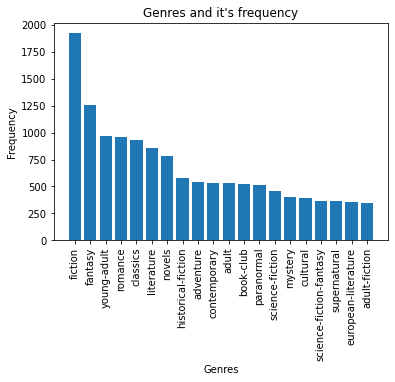

In [50]:
# plot the data here
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

The above graph displays the different genres on x-axis and it's frequency on y-axis.
From the graph we can conclude that the genre of the most of the books is fiction.